In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('Dataset.csv')
print(dataset.head())

         Day      Date  CodedDay  Zone  Weather  Temperature  Traffic
0  Wednesday  01-06-18         3     2       35           17        2
1  Wednesday  01-06-18         3     3       36           16        3
2  Wednesday  01-06-18         3     4       27           25        5
3  Wednesday  01-06-18         3     5       23           23        3
4  Wednesday  01-06-18         3     6       18           42        2


In [4]:
missing_values = dataset.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Day            0
Date           0
CodedDay       0
Zone           0
Weather        0
Temperature    0
Traffic        0
dtype: int64


In [5]:
numeric_columns = dataset.select_dtypes(include=['number']).columns
Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset[numeric_columns] < (Q1 - 1.5 * IQR)) | (dataset[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of outliers in each numerical column:")
print(outliers)


Number of outliers in each numerical column:
CodedDay       0
Zone           0
Weather        0
Temperature    0
Traffic        0
dtype: int64


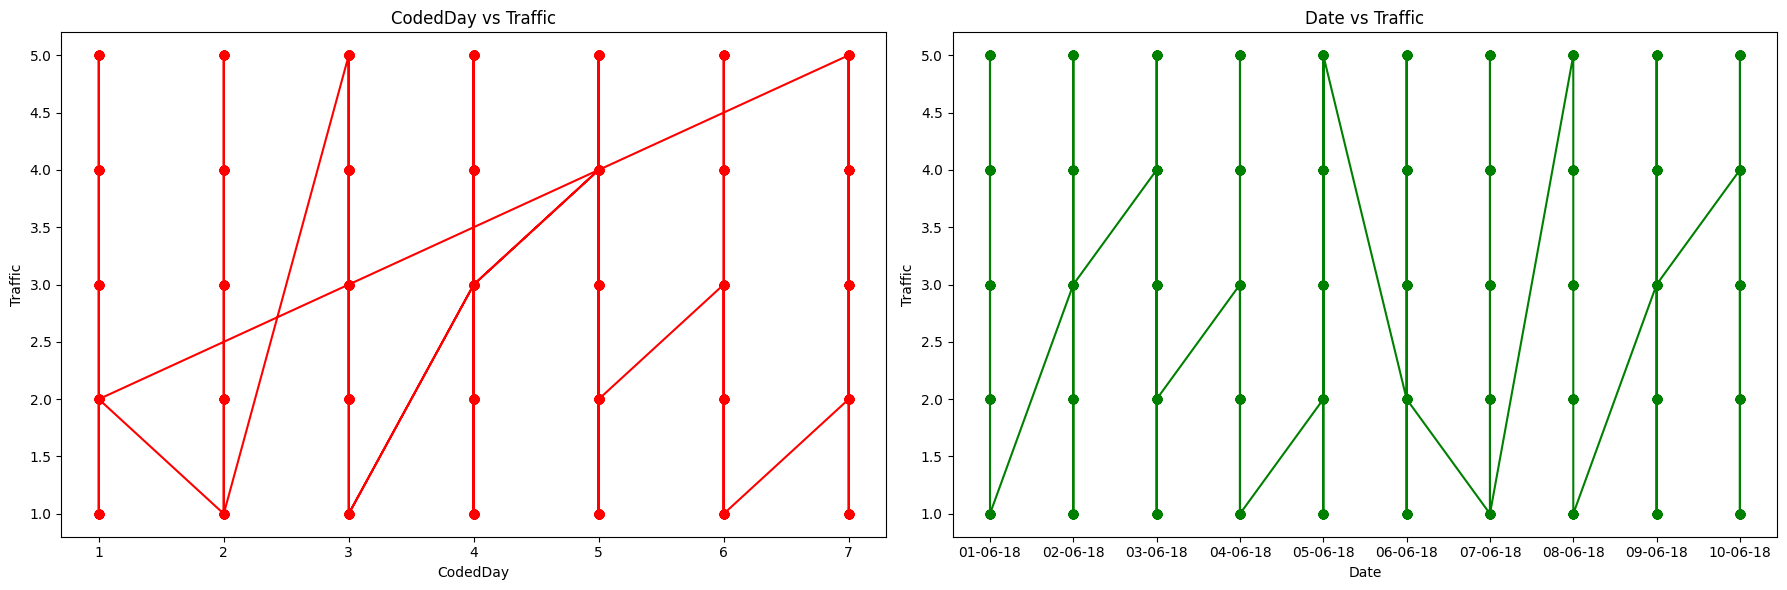

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Date vs Traffic subplot
axs[1].scatter(dataset['Date'], dataset['Traffic'], label='Date vs Traffic', color='green')
axs[1].plot(dataset['Date'], dataset['Traffic'], linestyle='-', color='green')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Traffic')
axs[1].set_title('Date vs Traffic')

# CodedDay vs Traffic subplot
axs[0].scatter(dataset['CodedDay'], dataset['Traffic'], label='CodedDay vs Traffic', color='red')
axs[0].plot(dataset['CodedDay'], dataset['Traffic'], linestyle='-', color='red')
axs[0].set_xlabel('CodedDay')
axs[0].set_ylabel('Traffic')
axs[0].set_title('CodedDay vs Traffic')

plt.tight_layout()

plt.show()


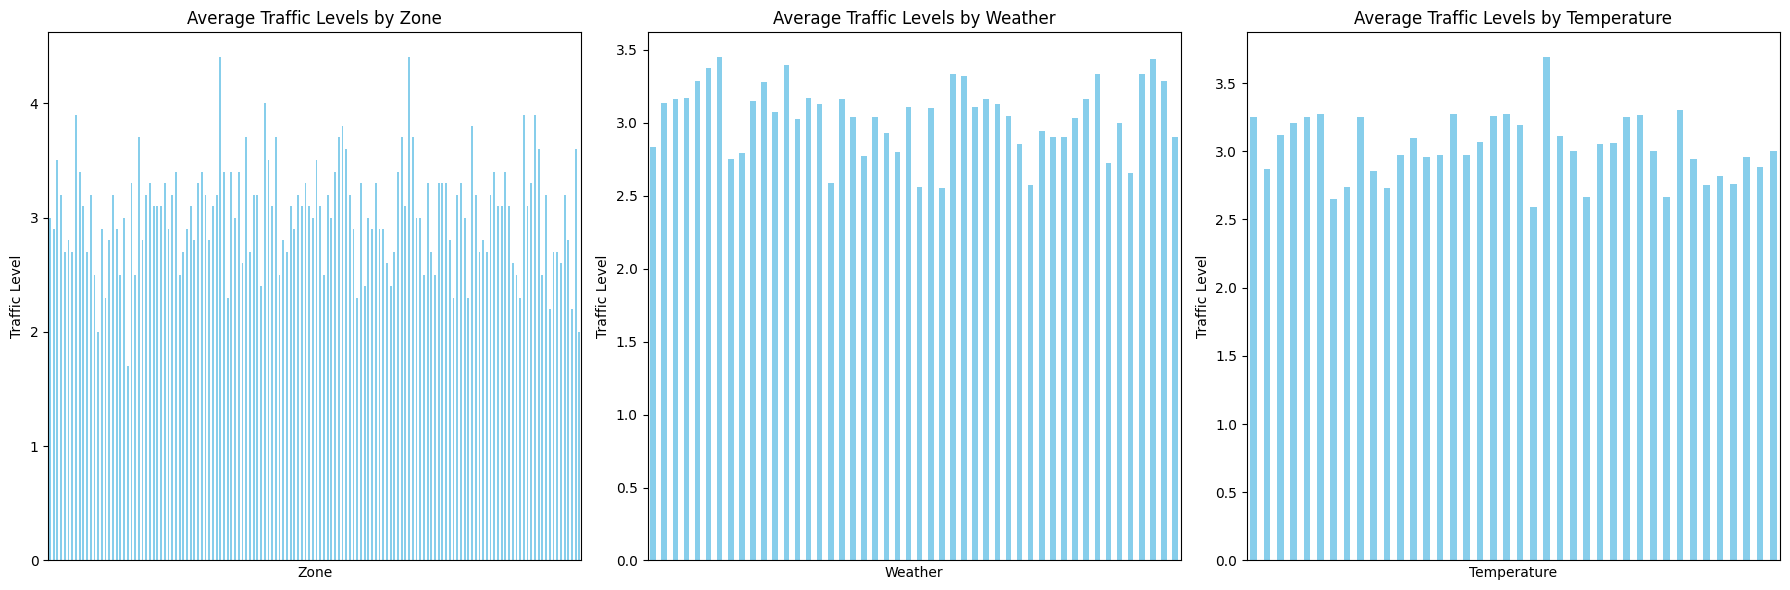

In [25]:
traffic_by_zone = dataset.groupby('Zone')['Traffic'].mean()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
traffic_by_zone.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Levels by Zone')
plt.xlabel('Zone')
plt.ylabel('Traffic Level')
plt.xticks([])

# Traffic by Weather
traffic_by_weather = dataset.groupby('Weather')['Traffic'].mean()

plt.subplot(1, 3, 2)
traffic_by_weather.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Levels by Weather')
plt.xlabel('Weather')
plt.ylabel('Traffic Level')
plt.xticks([])

# Traffic by Temperature
traffic_by_temperature = dataset.groupby('Temperature')['Traffic'].mean()

plt.subplot(1, 3, 3)
traffic_by_temperature.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Levels by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic Level')
plt.xticks([])

plt.tight_layout()
plt.show()

In [27]:
dataset.drop(columns=['Day'], inplace=True)
dataset.head()

,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,01-06-18,3,2,35,17,2
1,01-06-18,3,3,36,16,3
2,01-06-18,3,4,27,25,5
3,01-06-18,3,5,23,23,3
4,01-06-18,3,6,18,42,2


In [29]:
x = dataset.drop(columns=['Traffic', 'Date'])
y = dataset['Traffic']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [46]:
model = XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.555772246223804


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [52]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.1366720503374745


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.9480732355160428
